# The Sparks Foundation

### GRIP : Data Science and Business Analytics

### Author : James Mwangi

### Task 2 : Prediction Using Unsupervised Machine Learning

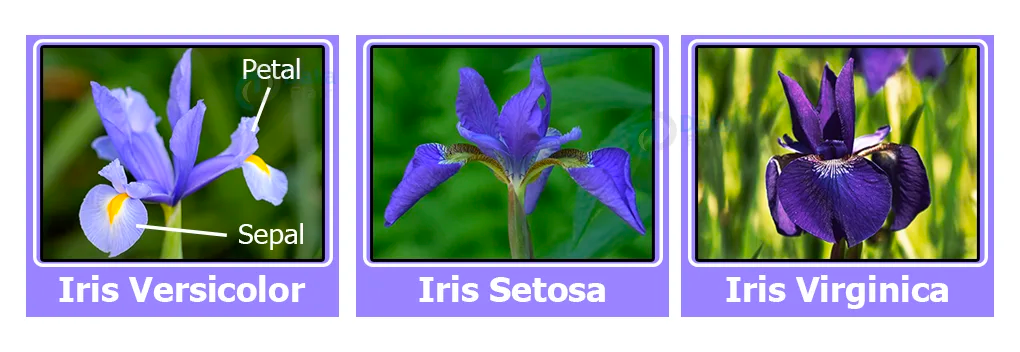

- **Project Title:** Iris Clustering Insights: Uncovering Patterns in Floral Data
- **Objective:** Utilize unsupervised machine learning to discover natural clusters within the Iris dataset.
- **Key Task:** Determine the optimal number of clusters and visualize these clusters.
- **Dataset:** Utilizing the Iris dataset (https://bit.ly/3kXTdox).
- **Approach:** Apply clustering algorithms to reveal patterns in the botanical data.
- **Significance:** Provide insights for plant taxonomy and species categorization.
- **Tools:** Python for data analysis, machine learning, and visualization.
- **Expected Outcome:** Clear visual representation of clusters within the Iris dataset.
- **Target Audience:** Researchers, botanists, and data enthusiasts interested in plant species analysis.

# A  . Loading the Dataset.

In [1]:
#Importing the libaries and packages to use in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Importing the  Dataset

iris = pd.read_csv("/kaggle/input/iris-clustering-insights-data/Iris (1).csv")

# B. Initial Data Exploration.

In [2]:
#Viewing the dataframe
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- ### Observing the datafame summary statistics

In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- ### Observing the dataframe categorical structure.

In [4]:
iris.describe(include = object)

,Species
count,150
unique,3
top,Iris-setosa
freq,50


## Data Visualization.
- In order to gain a deeper understanding of the Iris dataset, we will start by visualizing the data through various plots and charts. 
- These visualizations will provide insights into the distribution of features, pairwise relationships between them, and potential outliers, setting the stage for subsequent analysis and clustering.

- ## (A) Distribution Visualization.
  - To better understand the distribution of individual features within the Iris dataset, we will employ the use of histograms and density plots. 
  - These visualizations will allow us to explore the frequency and density of data points, helping us identify patterns and variations in each feature's distribution. 
  - By examining these plots, we can make informed decisions on data preprocessing and clustering  

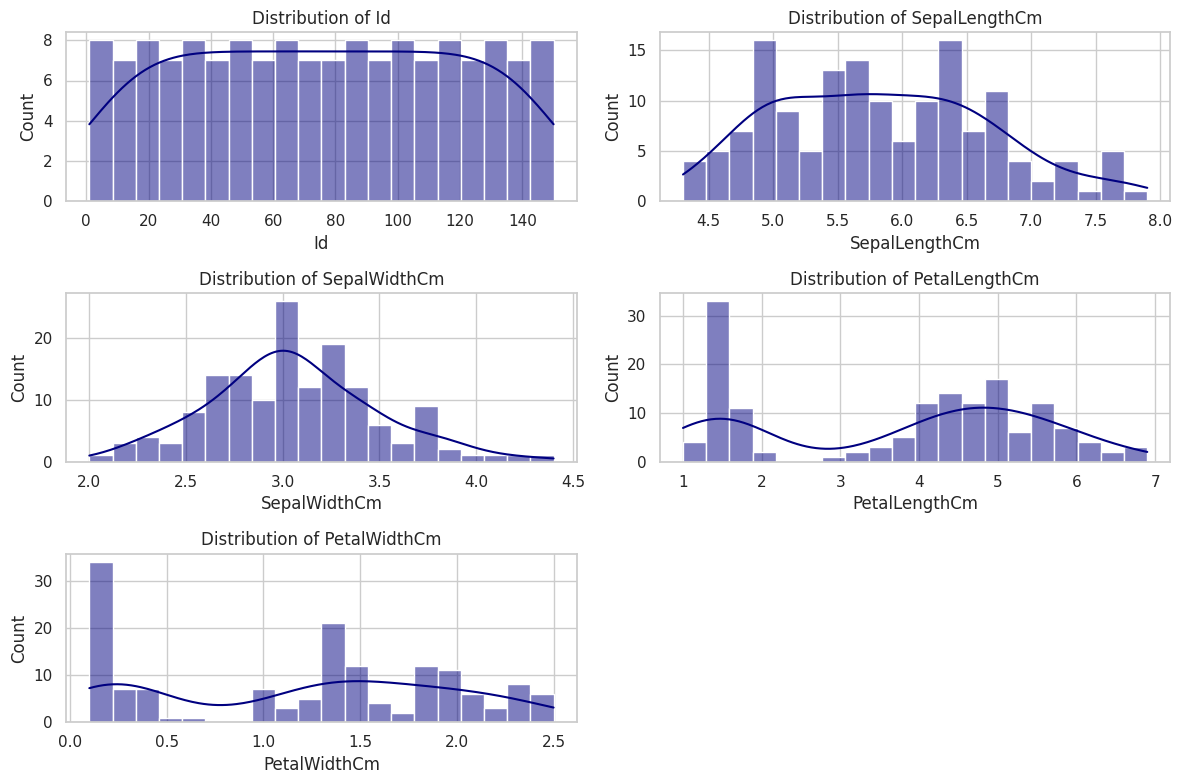

In [5]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot histograms for each feature
plt.figure(figsize=(12, 8))

# Iterate through each feature
for i, feature in enumerate(iris.columns[:-1]):
    plt.subplot(3, 2, i+1)
    sns.histplot(iris[feature], kde=True, color='navy', bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### 1. Id:

- The histogram for Id shows a uniformly distributed pattern. - In a uniformly distributed dataset, each value occurs with roughly equal frequency, and there is no apparent pattern or skewness.
### 2. Sepal Width (SepalWidthCm):

- The histogram for Sepal Width (SepalWidthCm) suggests a roughly normal distribution. 
- This is indicated by a single peak in the data centered around the mean (approximately 3.05) and a symmetric shape.

### 3. Sepal Length (SepalLengthCm):

- The histogram for Sepal Length (SepalLengthCm) also suggests a nearly normal distribution. 
- It exhibits a single peak around the mean (approximately 5.84), and the distribution is relatively symmetric.
### 4. Petal Length (PetalLengthCm) and Petal Width (PetalWidthCm):

- The histograms for Petal Length (PetalLengthCm) and Petal Width (PetalWidthCm) exhibit a bimodal distribution. 
- This means that there are two distinct peaks, indicating the presence of two different subpopulations or categories within the dataset. 
- In the context of the Iris dataset, this suggests that there may be two distinct types or species of flowers that exhibit different characteristics in terms of petal length and width

- ## (B) Pairwise Relationship Visualization.
  - Delving into Pairwise Relationship Visualization of the iris dataset offers a revealing glimpse into the intricate interplay between its various attributes, including sepal length, sepal width, petal length, and petal width, providing valuable insights into their correlations and patterns.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


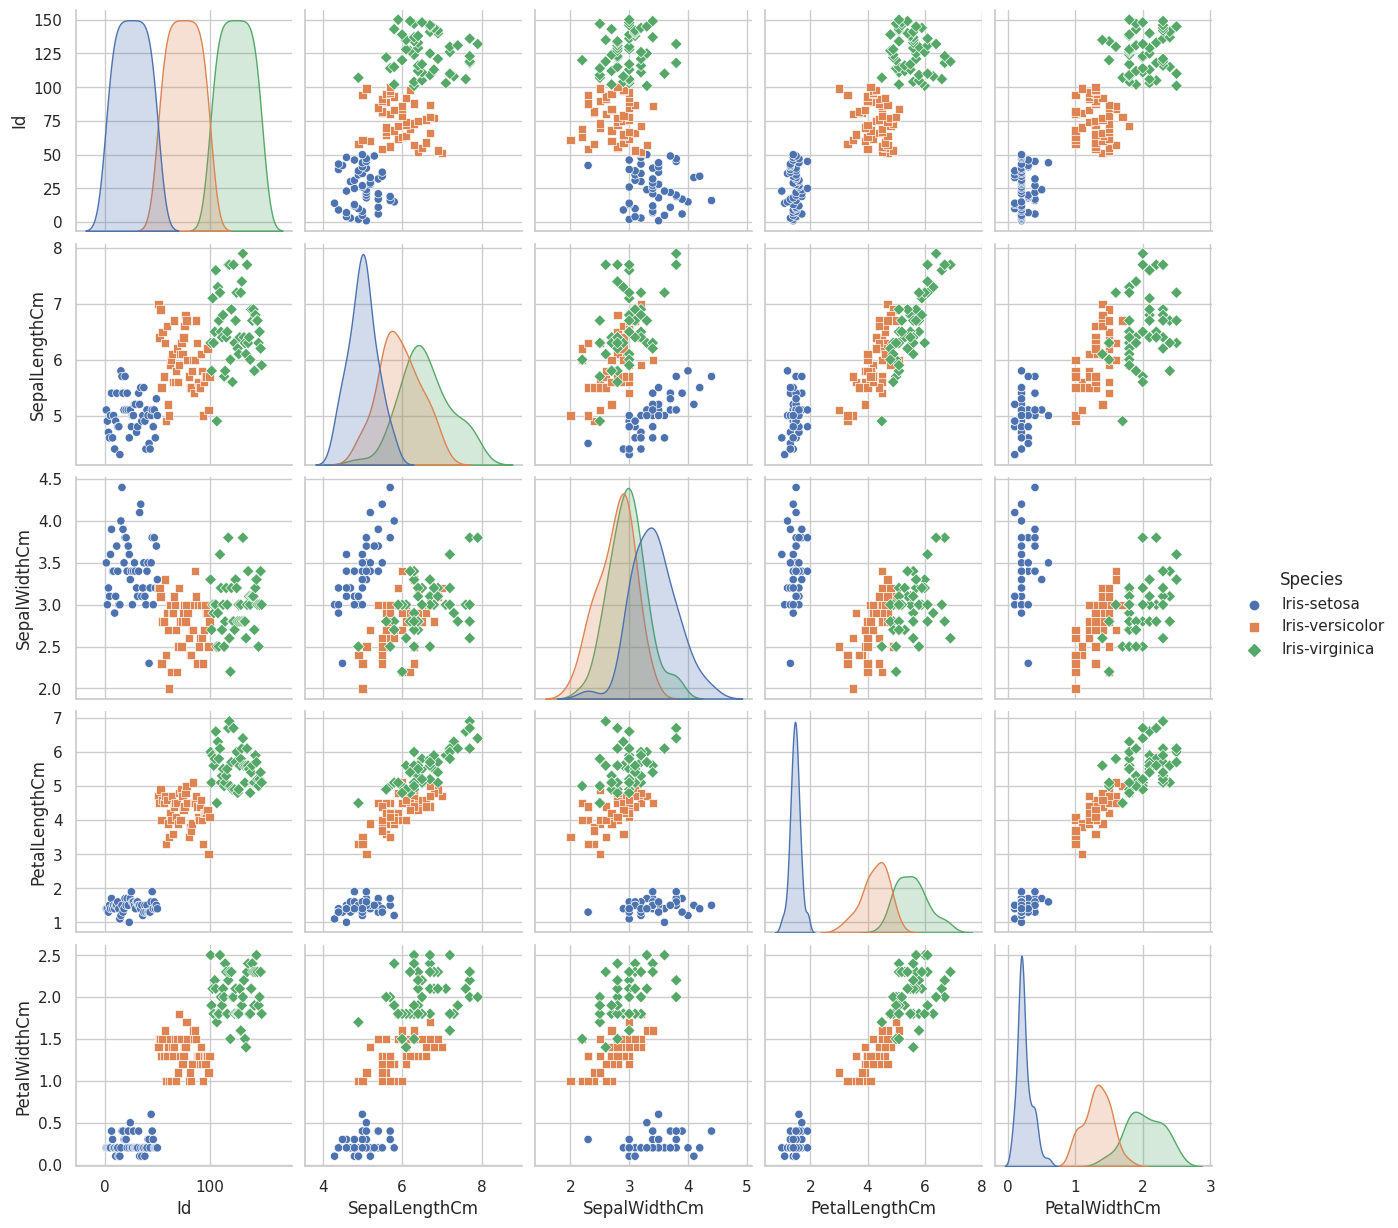

In [6]:
# Pair plot for pairwise relationships
sns.pairplot(iris, hue="Species", markers=["o", "s", "D"])

Here are some key observations from the Pairwise Relationship Visualization:

### 1. Species Differentiation: 
- You can see that the points are clearly clustered and color-coded based on the species. 
- This suggests that the species are distinguishable based on the feature combinations. 
- For instance, Iris-setosa (in blue) typically has distinct characteristics compared to the other two species.

### 2.Scatter Plots and Correlations:

- **SepalLengthCm vs. SepalWidthCm:** These plots show the relationship between sepal length and sepal width. You can observe that while there is some overlap, the three species have different ranges for these two features.
- **SepalLengthCm vs. PetalLengthCm and SepalWidthCm vs. PetalWidthCm:** These plots demonstrate that there are correlations between sepal and petal measurements. Some species show stronger correlations than others.
- **PetalLengthCm vs. PetalWidthCm:** These plots show a strong positive correlation. Species clusters are well-defined in these plots, suggesting that petal measurements are crucial for species differentiation.
### 3.Diagonal Plots: 
- The diagonal plots show histograms for each feature. 
- They provide insights into the distribution of each feature within each species. 
- For instance, you can see that the distribution of PetalLengthCm and PetalWidthCm for Iris-setosa is quite distinct from the other two species.

### 4. Outliers: 
- Outliers can be identified as points that are far from the main clusters. 
- For example, in some plots, you might see a few outliers, which could be interesting data points to investigate.


> - In summary, the Pairwise Relationship Visualization of the Iris dataset helps you visually explore the relationships and differences between the features of different species. 
>- It shows that petal measurements, in particular, are highly indicative of the species, and the species can be fairly well-distinguished based on these features. 
>- Sepal measurements also contribute to species differentiation but to a lesser extent.

- ## (C) Outlier Detection.

  - Box plots are a valuable tool for detecting outliers within a dataset. 
  - They offer a concise visual summary of data distribution and help in identifying values that stand out as potential anomalies or extreme data points. 
  - By providing a clear representation of the data's central tendency and spread, box plots assist in quickly spotting any data points that may be significantly different from the rest of the values. 
  - This makes them a crucial component of data analysis, especially when examining data quality and integrity.

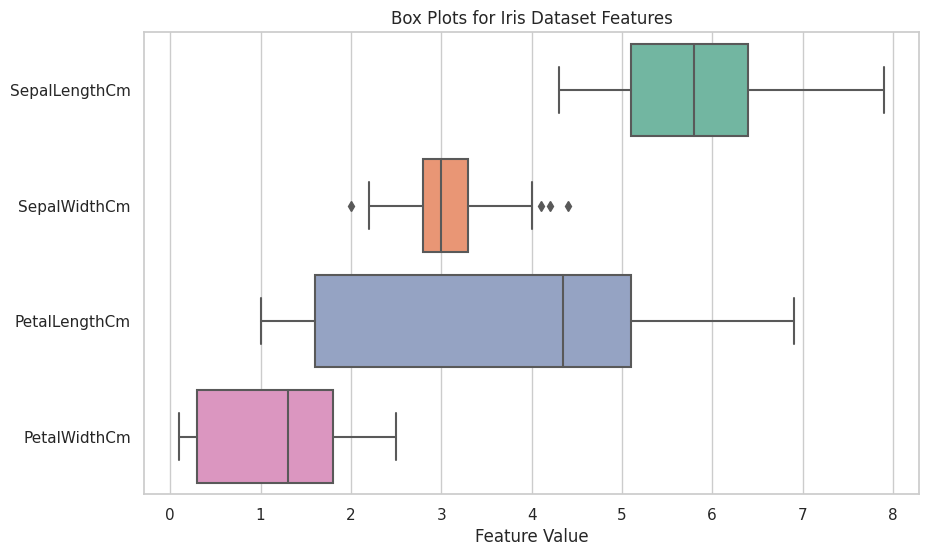

In [7]:
# Create box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris.drop('Id', axis=1), orient='h', palette='Set2')
plt.title('Box Plots for Iris Dataset Features')
plt.xlabel('Feature Value')
plt.show()



The boxplot visualization for the Iris dataset reveals some key insights:

- **SepalWidthCm:** This boxplot shows that there are outliers in the SepalWidthCm feature. There is one data point below the lower whisker and three data points above the upper whisker. These data points fall outside the typical range of SepalWidthCm values, indicating potential outliers in this feature.

- ### Dealing with the Outliers.

In [8]:
# Calculate the lower and upper whiskers (e.g., using IQR)
Q1, Q3 = iris['SepalWidthCm'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_whisker, upper_whisker = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Replace outliers with the mode
iris['SepalWidthCm'] = iris['SepalWidthCm'].apply(lambda x: iris['SepalWidthCm'].mode().values[0] if x < lower_whisker or x > upper_whisker else x)

<Axes: >

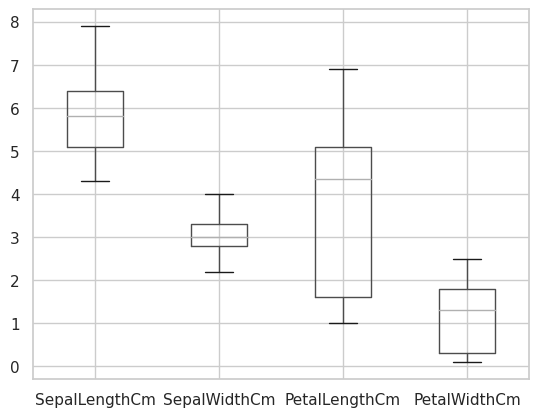

In [9]:
iris.drop('Id',axis = 1).boxplot()

### Outliers removed 

# C. Data Modelling

## Step 1: Choosing the number of clusters using the elbow method


- The elbow method aids in selecting the optimal number of clusters for clustering algorithms. 
- It involves testing various cluster counts, measuring quality, and identifying a point on a plot where the rate of improvement changes significantly, indicating the ideal number of clusters.

In [10]:
# Interested in clustering based on the numerical features. i.e  Drop the 'Id' and 'Species' columns
X = iris.drop(['Id', 'Species'], axis=1)

In [11]:
# Determine the optimum number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

[675.4573999999999,
 149.2879861111111,
 76.63733820033956,
 55.22013035714285,
 44.463887301587306,
 38.45498974358975,
 33.64757176157177,
 29.79510350760351,
 27.987095571095573,
 26.231257928346164]

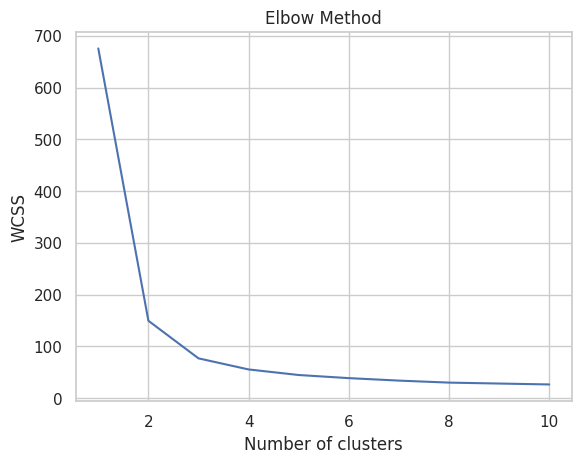

In [12]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

### Number of Clusters = 3.

## Step 2: Model Training.

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

# Step 3: Cluster Assignments.

In [14]:
cluster_assignments = kmeans.predict(X)
cluster_assignments

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Step 4: Cluster Analysis and Visualization .

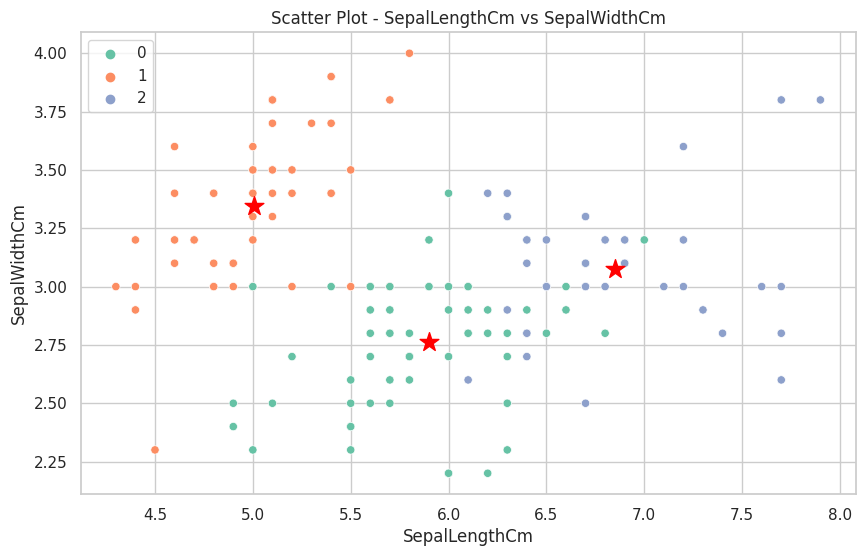

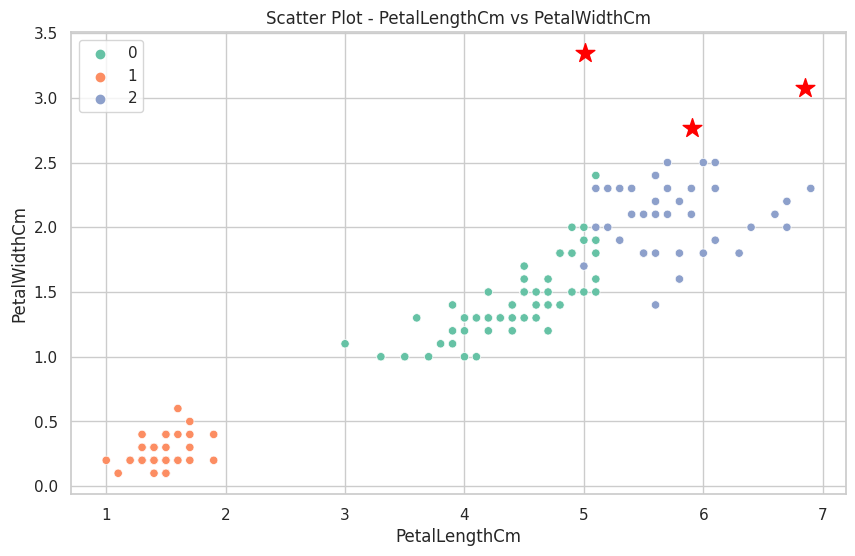

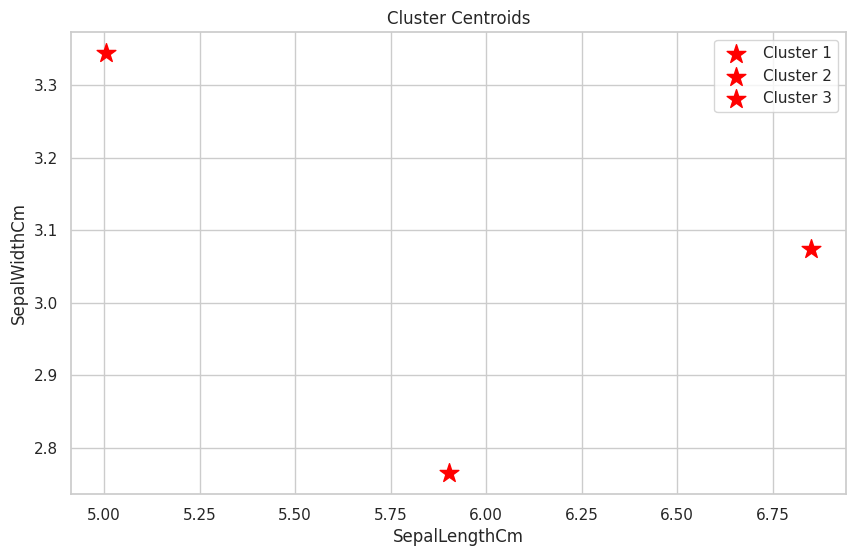

In [15]:
# Create scatter plots for each feature pair
feature_pairs = [('SepalLengthCm', 'SepalWidthCm'), ('PetalLengthCm', 'PetalWidthCm')]

for i, pair in enumerate(feature_pairs):
    feature1, feature2 = pair
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=iris[feature1], y=iris[feature2], hue=cluster_assignments, palette='Set2')
    plt.title(f'Scatter Plot - {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    # Add the cluster centroids to the scatter plot
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*',s=200, color='red', label='Centroids')

    plt.show()

# Plot cluster centroids
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(kmeans.cluster_centers_):
    plt.scatter(cluster[0], cluster[1], marker='*',s=200 ,color='red', label=f'Cluster {i+1}')
plt.title('Cluster Centroids')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()


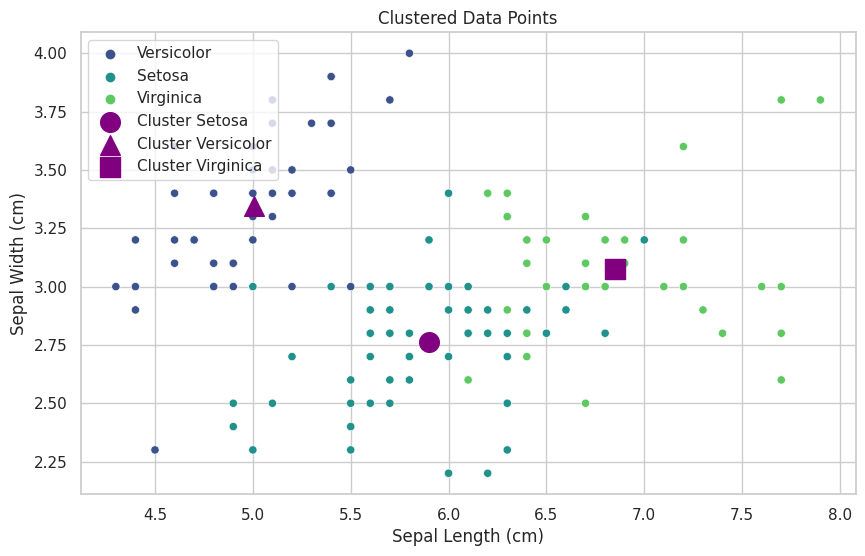

In [16]:
cluster_centers = kmeans.cluster_centers_
# Create a mapping between cluster assignments and species
cluster_species_mapping = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}

# Create a new column in your dataset to store the cluster labels based on species
X['Cluster'] = cluster_assignments
X['Cluster'] = X['Cluster'].map(cluster_species_mapping)

# Visualization (e.g., scatter plot)
plt.figure(figsize=(10, 6))

# Scatter plot of Sepal Length vs Sepal Width with cluster assignments
sns.scatterplot(x=X['SepalLengthCm'], y=X['SepalWidthCm'], hue=X['Cluster'], palette='viridis')

# Scatter plot of cluster centers with different marker shapes
markers = ['o', '^', 's']
for i, cluster in enumerate(cluster_centers):
    plt.scatter(cluster[0], cluster[1], marker=markers[i], color='purple', s=200, label=f'Cluster {cluster_species_mapping[i]}')

plt.title('Clustered Data Points')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='upper left')
plt.show()


## Step 5 : Interpretation.

The clustering results are consistent with the known species labels of the Iris dataset, indicating that the clustering algorithm has successfully grouped the data points based on their numerical features (Sepal Length and Sepal Width) in a way that aligns with the different Iris species.

1. **Cluster 1 (Iris setosa):** This cluster is characterized by relatively short Sepal Lengths and narrow Sepal Widths, aligning with the typical characteristics of Iris setosa.

2. **Cluster 2 (Iris versicolor):** This cluster consists of data points with intermediate Sepal Lengths and intermediate Sepal Widths, which corresponds to the expected features of Iris versicolor.

3. **Cluster 3 (Iris virginica):** This cluster includes data points with relatively long Sepal Lengths and wide Sepal Widths, consistent with the known characteristics of Iris virginica.

>- In summary, the clustering algorithm has successfully identified and grouped similar patterns in the data, aligning with the distinct characteristics of the three Iris species.

## Reasons for Choosing Sepal Features Over Petal Features in Iris Species Clustering.

1. **High Correlation:** Petal length and petal width are highly correlated features. Their tendency to move in tandem suggests that using both features for cluster analysis may not yield additional meaningful information.

2. **Lack of Discrimination:** Petal length and petal width exhibit continuous variation across the three iris species, lacking clear separation. This makes it challenging for cluster analysis algorithms to identify distinct clusters based on these features.

3. **Sensitivity to Outliers:** The features are sensitive to outliers, especially in cases where a few data points have extreme values for petal length and petal width. These outliers can significantly impact cluster centroids, leading to distorted cluster identification.

4. **Outlier Influence:** Including outliers with extreme values for petal length and petal width may cause cluster analysis algorithms to identify more than three clusters or clusters that do not accurately correspond to the three iris species.

# Closing Summary: Iris Clustering Insights

The Iris Clustering Insights project aimed to uncover patterns in floral data using unsupervised machine learning techniques. Through a systematic approach, the project accomplished the following key tasks:

### 1. Dataset Loading and Exploration:

- The Iris dataset was imported, and a preliminary exploration revealed its structure and statistical summary.
- The dataset comprised four features: Sepal Length, Sepal Width, Petal Length, and Petal Width, along with the corresponding Iris species labels.
### 2. Data Visualization:

- Histograms and density plots were utilized to visualize the distribution of individual features, providing insights into the frequency and density of data points.
- Pairwise relationship visualizations facilitated a deeper understanding of correlations and patterns between different features, especially highlighting the distinguishable nature of Iris species.
### 3. Outlier Detection and Handling:

- Box plots were employed to identify outliers in the Sepal Width feature.
- Outliers were addressed by replacing them with the mode, ensuring the integrity of the dataset.
### 4. Data Modeling and Clustering:

- The unsupervised K-Means clustering algorithm was applied to identify natural clusters within the dataset.
- The elbow method was employed to determine the optimal number of clusters, revealing that three clusters were suitable for this analysis.
- The model was trained, and cluster assignments were obtained for each data point.
### 5. Cluster Analysis and Visualization:

- The results were visualized through scatter plots, showcasing the distribution of data points and the centroids of each cluster.
- Cluster assignments were mapped to species labels, providing meaningful interpretations for each cluster.
- Interpretation of the clusters aligned well with the known characteristics of the Iris species.
### 6. Reasons for Feature Selection:

- Sepal features were chosen over petal features for clustering analysis.
- Reasons included high correlation between petal length and width, lack of discriminative power in petal features, and sensitivity to outliers in petal measurements.
### 7. Closing Thoughts:

- The project successfully demonstrated the power of unsupervised learning in revealing hidden patterns within the Iris dataset.
- The clustering results aligned with known species labels, affirming the effectiveness of the chosen approach.
- Insights gained from visualizations and interpretations contribute to plant taxonomy and species categorization.


>- In conclusion, the Iris Clustering Insights project not only provided a practical application of unsupervised learning but also showcased the importance of thoughtful feature selection and interpretation in extracting meaningful information from botanical data. 
> -The insights gained can be valuable for researchers, botanists, and data enthusiasts interested in plant species analysis.

This closes the  Iris Clustering Insights: Uncovering Patterns in Floral Data Project.